# Q1_Asgn1

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chi2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

In [2]:
data=pd.read_csv("train3.csv",header=None)
dataset=data.iloc[0:130,]


In [3]:
pca=PCA(n_components=2,svd_solver="full")
pca_model=pca.fit(dataset)




In [4]:
mean_image=np.array(dataset.mean())

In [5]:
d=np.sqrt(1/2)*np.array([[1,1],[1,-1]])



In [6]:
s=pca.fit(d)



In [7]:
s.explained_variance_



array([1., 0.])

#### Mean Image

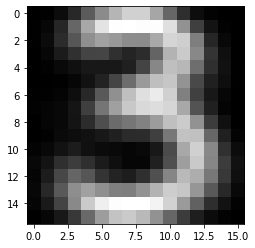

In [8]:
mean_image=mean_image.reshape([16,16])
plt.gray()
plt.imshow(mean_image)

### PCA1 Image

In [9]:
PCA1=pca_model.components_[0].reshape([16,16])
plt.gray()
plt.imshow(PCA1)

ValueError: cannot reshape array of size 2 into shape (16,16)

### First eigen vector

In [ ]:
print(pca_model.components_[0])

### PCA2 Image

In [ ]:
PCA2=pca_model.components_[1].reshape([16,16])
plt.gray()
plt.imshow(PCA2)

### Second eigen vector

In [ ]:
print(pca_model.components_[1])

### Eigen values

In [ ]:
round(pca_model.explained_variance_ratio_[0],3)

In [ ]:
round(pca_model.explained_variance_ratio_[1],3)

- **Observation: First two eigen vectors explain  around 25% of variance.**

# Q3_Asgn1

In [10]:
mu=np.array([2,1])
cov=np.array([[1 ,-0.2],[-0.2,1]]
            )

eigen_values,eigen_vector_matrix=np.linalg.eig(cov)

In [11]:
eigen_vector_matrix

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [12]:
eigen_values


array([1.2, 0.8])

### Contour Plot for Bi-variate Normal Distribution

In [ ]:
step_size = 0.3
cont_levels = np.arange(0, 4, step_size)
axis_angle=np.arccos(np.dot(eigen_vector_matrix[:,0]/np.linalg.norm(eigen_vector_matrix[:,0]),[1,0]))*180/np.pi
# to get angle in degrees between x-axis and the contour ellipses major axis
sub_plot = plt.subplot(aspect='equal')
for level in cont_levels:
    ellipse = Ellipse((2,1), level*math.sqrt(eigen_values[0]), level*math.sqrt(eigen_values[1]), angle=axis_angle, fill=False, edgecolor='black')
    sub_plot.add_artist(ellipse)
    
plt.xlim(-1, 5)
plt.ylim(-2, 4)
plt.quiver([1,2],[2,1],eigen_vector_matrix[:,0],eigen_vector_matrix[:,1],scale=0.5,color=['r','g'])
plt.show()

- Red one is minor and green is major. Both vectors are stored below.

In [ ]:
major_axis=eigen_vector_matrix[:,0]
minor_axis=eigen_vector_matrix[:,1]

### Axis Lengths
- Here predict_level indicates the $(1-\alpha)$ prediction area of above ellipse.

In [ ]:
predict_level=0.95 # that means alpha = 0.05
critical_level=chi2.ppf(predict_level,2)

#### a). Major Axis Length with $\alpha=0.05$

In [ ]:
round(np.sqrt(critical_level*eigen_values[0]),2)

#### b). MInor Axis Length with $\alpha=0.05$

In [ ]:
round(np.sqrt(critical_level*eigen_values[1]),2)

In [ ]:
print(np.sqrt(1.6)/np.sqrt(2.4)) # with BS predict level approach

print(3.1/3.8) #with d=1